In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [330]:
# External Data Link
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

In [331]:
# Load Data
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [332]:
# Initial Data View
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [333]:
# Start of Data Cleaning Process
properties = properties.transpose()

In [334]:
properties = properties.reset_index()

In [335]:
properties.head()

,index,0,1,2,3,4,5,6,7,8,...,301,302,303,304,305,306,307,308,309,310
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,773679,792769,828658,900126,904803,869929,785001,794881,768714,721490
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,303054,302748,301570,293553,292478,299074,303701,304696,301170,308583
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,521612,516411,522770,529115,527494,517266,521528,525762,535663,536263
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,336863,338817,339095,341997,338857,340723,343385,348046,345461,344254


In [336]:
# Moving Dates to Column Header to prepare for .melt
properties.columns = properties.iloc[0]

In [337]:
properties = properties.drop([0])

In [338]:
properties = properties.rename(columns = {'Unnamed: 0': 'London Borough', pd.NaT: 'ID'})

In [339]:
properties.head()

,London Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,773679,792769,828658,900126,904803,869929,785001,794881,768714,721490
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,303054,302748,301570,293553,292478,299074,303701,304696,301170,308583
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,521612,516411,522770,529115,527494,517266,521528,525762,535663,536263
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,336863,338817,339095,341997,338857,340723,343385,348046,345461,344254
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,428436,469962,465941,469583,481570,485388,485619,496606,522546,518636


In [340]:
prop_melted = pd.melt(properties, id_vars = ['London Borough', 'ID'])

In [341]:
prop_melted.head()

,London Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [342]:
prop_melted = prop_melted.rename(columns = {0:'Date', 'value':'Price'})

In [343]:
prop_melted.dtypes

London Borough            object
ID                        object
Date              datetime64[ns]
Price                     object
dtype: object

In [344]:
prop_melted['Price'] = pd.to_numeric(prop_melted['Price'])

In [345]:
prop_melted.dtypes

London Borough            object
ID                        object
Date              datetime64[ns]
Price                    float64
dtype: object

In [346]:
prop_melted.count()

London Borough    14880
ID                13950
Date              14880
Price             13950
dtype: int64

In [347]:
prop_melted['London Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [348]:
# Testing likely bad borough names
prop_melted[prop_melted['London Borough'] == 'Unnamed: 34'].head()

,London Borough,ID,Date,Price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [349]:
prop_melted.dropna(subset=['ID'], inplace=True)

In [350]:
prop_melted[prop_melted['London Borough'] == 'England'].head()

,London Borough,ID,Date,Price
47,England,E92000001,1995-01-01,53202.77128
95,England,E92000001,1995-02-01,53096.15490
143,England,E92000001,1995-03-01,53201.28430
191,England,E92000001,1995-04-01,53590.85480
239,England,E92000001,1995-05-01,53678.24041


In [351]:
# List of Borough in dataframe that aren't boroughs (Wikipedia source)
badborough = ['City of London', 'Inner London','Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER','EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON','SOUTH EAST', 'SOUTH WEST', 'England']

In [352]:
prop_bor_removed = prop_melted[~prop_melted['London Borough'].isin(badborough)]

In [353]:
prop_bor_removed['London Borough'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [354]:
# Redifining dataframe after completeion of cleaning process
df = prop_bor_removed

In [355]:
df[df['ID'].isna()]

,London Borough,ID,Date,Price


In [356]:
# These lambda functions worked to pull out year and month but unceare what the warning means...
df['Year'] = df['Date'].apply(lambda t: t.year)

<ipython-input-356-ec98c7d538ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].apply(lambda t: t.year)


In [357]:
df['Month'] = df['Date'].apply(lambda t: t.month)

<ipython-input-357-045fe2c7144c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].apply(lambda t: t.month)


In [358]:
df.head()

,London Borough,ID,Date,Price,Year,Month
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995,1
2,Barnet,E09000003,1995-01-01,93284.51832,1995,1
3,Bexley,E09000004,1995-01-01,64958.09036,1995,1
4,Brent,E09000005,1995-01-01,71306.56698,1995,1
5,Bromley,E09000006,1995-01-01,81671.47692,1995,1


In [359]:
df.dtypes

London Borough            object
ID                        object
Date              datetime64[ns]
Price                    float64
Year                       int64
Month                      int64
dtype: object

In [360]:
# Test of data after cleaning process
barnet = df[df['London Borough'] == 'Barnet']

In [361]:
barnet.head()

,London Borough,ID,Date,Price,Year,Month
2,Barnet,E09000003,1995-01-01,93284.51832,1995,1
50,Barnet,E09000003,1995-02-01,93190.16963,1995,2
98,Barnet,E09000003,1995-03-01,92247.52435,1995,3
146,Barnet,E09000003,1995-04-01,90762.87492,1995,4
194,Barnet,E09000003,1995-05-01,90258.00033,1995,5


<AxesSubplot:xlabel='Date'>

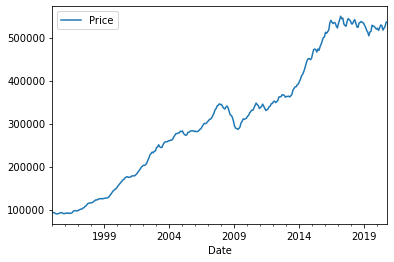

In [362]:
# Map test
barnet.plot(x='Date', y='Price', kind='line')

In [363]:
# need to group by years and boroughs to determine average price change over time
df_year = df.groupby(by=['London Borough', 'Year']).mean()
df_year.sample(15)

,,Price,Month
London Borough,Year,,
Enfield,2012,247667.148392,6.5
Barnet,2016,525939.577300,6.5
Merton,1998,108049.855117,6.5
Camden,2001,278594.043717,6.5
Waltham Forest,2019,430501.945317,6.5
Barnet,2003,251212.927683,6.5
Haringey,1995,80078.489250,6.5
Richmond upon Thames,2000,227866.164158,6.5
Ealing,2003,221689.173708,6.5


In [364]:
df_year.head()

Price  Month
London Borough     Year                     
Barking & Dagenham 1995  51817.969390    6.5
                   1996  51718.192690    6.5
                   1997  55974.262309    6.5
                   1998  60285.821083    6.5
                   1999  65320.934441    6.5

In [365]:
df_year = df_year.reset_index()
df_year.head()

,London Borough,Year,Price,Month
0,Barking & Dagenham,1995,51817.969390,6.5
1,Barking & Dagenham,1996,51718.192690,6.5
2,Barking & Dagenham,1997,55974.262309,6.5
3,Barking & Dagenham,1998,60285.821083,6.5
4,Barking & Dagenham,1999,65320.934441,6.5


In [366]:
# Testing of price change over two decades and defining function
def price_change (x):
    y2000 = float(x['Price'][x['Year']==2000])
    y2020 = float(x['Price'][x['Year']==2020])
    change = [y2000/y2020]
    return change

In [367]:
price_change(df_year[df_year['London Borough'] == 'Barnet'])

[0.3196732291632454]

In [368]:
# Implementation of function and iterating for all boroughs
final_change = {}

In [369]:
for c in df_year['London Borough'].unique():
    borough = df_year[df_year['London Borough'] == c]
    final_change[c] = price_change(borough)
print(final_change)

{'Barking & Dagenham': [0.25758586178141046], 'Barnet': [0.3196732291632454], 'Bexley': [0.3019362380170929], 'Brent': [0.2921934236352349], 'Bromley': [0.33923027507189535], 'Camden': [0.2936961043268812], 'Croydon': [0.31725180829140837], 'Ealing': [0.3184214306624921], 'Enfield': [0.3100264999360693], 'Greenwich': [0.27829649424862696], 'Hackney': [0.2300638731666138], 'Hammersmith & Fulham': [0.3463603191257027], 'Haringey': [0.2630010046067807], 'Harrow': [0.3388050861099838], 'Havering': [0.2964194642361592], 'Hillingdon': [0.32088003489333305], 'Hounslow': [0.33456774613845397], 'Islington': [0.2903550215211969], 'Kensington & Chelsea': [0.2852337163294437], 'Kingston upon Thames': [0.3300176131302048], 'Lambeth': [0.28153175508616873], 'Lewisham': [0.2542216430201604], 'Merton': [0.29120112478533194], 'Newham': [0.24834210099753037], 'Redbridge': [0.2955517836719701], 'Richmond upon Thames': [0.3351879012563741], 'Southwark': [0.2822159333230038], 'Sutton': [0.33596927230718276

In [370]:
# Changing function dictionary output to final data frame for analysis and review
df_final = pd.DataFrame(final_change)

In [371]:
df_final.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.257586,0.319673,0.301936,0.292193,0.33923,0.293696,0.317252,0.318421,0.310026,0.278296,...,0.291201,0.248342,0.295552,0.335188,0.282216,0.335969,0.306734,0.231316,0.301695,0.267999


In [372]:
df_final = df_final.transpose()

In [373]:
df_final = df_final.reset_index()

In [374]:
df_final.head()

,index,0
0,Barking & Dagenham,0.257586
1,Barnet,0.319673
2,Bexley,0.301936
3,Brent,0.292193
4,Bromley,0.339230


In [375]:
df_final = df_final.rename(columns = {'index': 'London_Borough', 0: 'Average_Price_Ratio'})

In [376]:
df_final.head()

,London_Borough,Average_Price_Ratio
0,Barking & Dagenham,0.257586
1,Barnet,0.319673
2,Bexley,0.301936
3,Brent,0.292193
4,Bromley,0.339230


In [377]:
top_change = df_final.sort_values(by='Average_Price_Ratio',ascending=False).head(32)
print(top_change)

          London_Borough  Average_Price_Ratio
11  Hammersmith & Fulham             0.346360
4                Bromley             0.339230
13                Harrow             0.338805
27                Sutton             0.335969
25  Richmond upon Thames             0.335188
16              Hounslow             0.334568
19  Kingston upon Thames             0.330018
15            Hillingdon             0.320880
1                 Barnet             0.319673
7                 Ealing             0.318421
6                Croydon             0.317252
8                Enfield             0.310026
28         Tower Hamlets             0.306734
2                 Bexley             0.301936
30            Wandsworth             0.301695
14              Havering             0.296419
24             Redbridge             0.295552
5                 Camden             0.293696
3                  Brent             0.292193
22                Merton             0.291201
17             Islington          

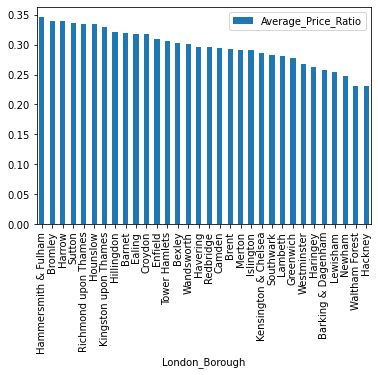

In [378]:
# Final analysis - Hammersmith & Fulham had the biggest average price increase from 2000 to 2020
apr = top_change[['London_Borough','Average_Price_Ratio']].plot(kind='bar', x='London_Borough')